In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#For interactive plots
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
#load the data
fertilizers = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')



In [3]:
fertilizers.Item.unique()

array(['Asses', 'Camels', 'Cattle', 'Chickens', 'Goats', 'Horses',
       'Mules', 'Sheep', 'Cattle and Buffaloes', 'Poultry Birds',
       'Sheep and Goats', 'Beehives', 'Buffaloes', 'Ducks',
       'Geese and guinea fowls', 'Pigs', 'Turkeys', 'Rabbits and hares',
       'Camelids, other', 'Rodents, other', 'Animals live nes',
       'Pigeons, other birds'], dtype=object)

## Now let us first extract all the beehives Element

In [4]:
beehives = fertilizers.loc[fertilizers['Item'] == 'Beehives']
beehives.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
684,3,Albania,1181,Beehives,5114,Stocks,1961,1961,No,95100.0,NaN
685,3,Albania,1181,Beehives,5114,Stocks,1962,1962,No,92800.0,NaN
686,3,Albania,1181,Beehives,5114,Stocks,1963,1963,No,83500.0,NaN
687,3,Albania,1181,Beehives,5114,Stocks,1964,1964,No,96500.0,NaN
688,3,Albania,1181,Beehives,5114,Stocks,1965,1965,No,109800.0,NaN


In [5]:
beehives.Area.unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia',
       'Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'L

This looks like a lot of countries.
We can further split the countries and see that they actually have countries, continents, regions, consolidations and areas based on indexes. 
We further explore that some of the countries do not exist anymore. Like USSR or Yugoslav SFR. We will handle these **later**.

In [6]:
countries = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia','Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium','Belgium-Luxembourg', 'Belize', 'Bolivia (Plurinational State of)','Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi','Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile','China', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba','Cyprus', 'Czechia', 'Czechoslovakia', 'Dominican Republic','Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia','Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia','Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam','Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti','Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)','Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya','Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein','Lithuania', 'Luxembourg', 'Madagascar', 'Mali', 'Martinique','Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique','Myanmar', 'Netherlands', 'New Caledonia', 'New Zealand','Nigeria', 'Niue', 'Occupied Palestinian Territory', 'Oman','Pakistan', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico','Republic of Korea', 'Republic of Moldova', 'Romania','Russian Federation', 'Rwanda', 'Samoa', 'Senegal', 'Serbia','Serbia and Montenegro', 'Slovakia', 'Slovenia', 'South Africa','Spain', 'Sudan', 'Sudan (former)', 'Sweden', 'Switzerland','Syrian Arab Republic', 'Tajikistan','The former Yugoslav Republic of Macedonia', 'Timor-Leste','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu','Uganda', 'Ukraine', 'United Kingdom','United Republic of Tanzania', 'United States of America','Uruguay', 'USSR', 'Uzbekistan','Venezuela (Bolivarian Republic of)', 'Viet Nam','Wallis and Futuna Islands', 'Yemen', 'Yugoslav SFR', 'Zambia']
world = ['World']
continents = ['Africa','Americas', 'Asia',  'Europe', 'Oceania']
regions = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa', 'Northern America', 'South America', 'Central America', 'Caribbean','Central Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Melanesia', 'Micronesia', 'Polynesia', 'Australia & New Zealand']
consolidations = ['European Union', 'China, mainland', 'China, Taiwan Province of',]
index_based = ['Least Developed Countries', 'Land Locked Developing Countries','Small Island Developing States','Low Income Food Deficit Countries', 'Net Food Importing Developing Countries']

It is important to split the data into these regions since they overlap and we would get the results were wrong

In [7]:
beehives_countries = beehives[beehives['Area'].isin(countries)]
beehives_world = beehives.loc[beehives['Area'] == 'World']
beehives_continents = beehives[beehives['Area'].isin(continents)]
beehives_regions = beehives[beehives['Area'].isin(regions)]
beehives_consolidations = beehives.loc[beehives['Area'] == 'European Union']
beehives_index_based = beehives[beehives['Area'].isin(index_based)]


### We can see that the dataset gives us a lot of different countries. In order to continue working on them we will consider countries. We will as well do a beehives world plot and take out the continents.

So let us now start with looking at the world distribution of the world set and check out if bees in general are growing or declining.

(1960, 2020)

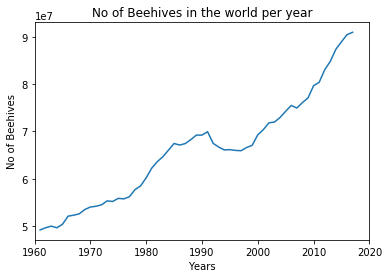

In [8]:
plt.plot(beehives_world['Year'], beehives_world['Value'])
plt.title('No of Beehives in the world per year')
plt.xlabel('Years')
plt.ylabel('No of Beehives')
plt.xlim(1960, 2020)

We can also see that our dataset ranges from 1961 to 2017.

## Let us now also take a quick look on the 10 countries with the biggest beehives population in 2017

In [9]:
beehives_countries[beehives_countries['Year'] == 2017].sort_values('Value', ascending=False)[['Area','Value']].head(10)


,Area,Value
59382,India,12763684.0
24658,China,9156882.0
124390,Turkey,7796666.0
60864,Iran (Islamic Republic of),7271825.0
42356,Ethiopia,6139990.0
103336,Russian Federation,3349976.0
4103,Argentina,3003036.0
128271,United Republic of Tanzania,2998785.0
114105,Spain,2904971.0
128898,United States of America,2669000.0


Looking at the top ten we can see that they are spread around the world. With this we mean there are contributors in Asia, Europe, America and Africa. Only Oceania is missing. 

In [10]:
topTenContributors = beehives_countries[beehives_countries['Year'] == 2017].sort_values('Value', ascending=False)['Value'].head(10).sum()
worldPopulationBeehives = int(beehives_world[beehives_world['Year'] == 2017].Value)
ratioTopTenWorld = topTenContributors/worldPopulationBeehives
print("Here we can observe that our top ten contributors are responsible for %s%% of the worlds population of beehives, which is %s in total" % (ratioTopTenWorld, worldPopulationBeehives))

Here we can observe that our top ten contributors are responsible for 0.637966892868803% of the worlds population of beehives, which is 90999730 in total


Let us now give some contribution to the smaller countries which support the beehives population as well. Therefore we add a column that is dividing the total number of beehives in the country divided by the estimate population. 

In [11]:
import geopandas as gpd
from matplotlib.collections import PatchCollection

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Let us just check our format.

In [13]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


We saw some differently spelled data, which we corrected in order to have correct the same names of countries.

In [14]:
beehives_perPopulation = beehives_countries.copy() 
beehives_perPopulation = beehives_perPopulation.replace({'Russian Federation': 'Russia', 'Bosnia and Herzegovina': 'Bosnia and Herz.', 'Belgium-Luxembourg': 'Luxembourg', 'Bolivia (Plurinational State of)':'Bolivia', 'Central African Republic':'Central African Rep.', 'China, Taiwan Province of': 'Taiwan', 'Dominican Republic': 'Dominican Rep.', 'Ethiopia PDR': 'Ethiopia', 'Iran (Islamic Republic of)':'Iran', 'Syrian Arab Republic':'Syria', 'North Macedonia':'Macedonia', 'Venezuela (Bolivarian Republic of)': 'Venezuela', 'Viet Nam':'Vietnam', 'Czechoslovakia':'Czechia'})
beehives_perPopulation = world.set_index('name').join(beehives_perPopulation.set_index('Area'))

In [15]:
beehives_perPopulation['Per_Population'] = beehives_perPopulation['Value']/beehives_perPopulation['pop_est']

In [16]:
beehives_perPopulation['Area'] = beehives_perPopulation.index

In [17]:
beehives_perPopulation[beehives_perPopulation['Year'] == 2017].sort_values('Per_Population', ascending=False)[['Value']].head(10)

,Value
Central African Rep.,1664185.0
New Zealand,820000.0
Greece,1561498.0
Uruguay,480154.0
Montenegro,80620.0
Serbia,849280.0
Croatia,486271.0
Bulgaria,754105.0
Bosnia and Herz.,404698.0
Turkey,7796666.0


Now we see different countries and there is New Zealand. One of the Oceanian countries. Interestingly 7 out of 10 countries are considered to be in eastern europe. 

## Oh we actually see the number of bees are increasing!
What we can further notice besides the increasing number of bees is a sudden drop between 1990 and 2000. Why is that? 

In [18]:
firstYear = int(beehives_world[beehives_world['Year'] == 1961]['Value'])
lastYear = int(beehives_world[beehives_world['Year'] == 2017]['Value'])
lastYear/firstYear

1.8505857822977034

In fact we have an increase of 185.06% over the last 56 Years. 
But wasn't everyone telling bees are dying out? 

In [19]:
beehives_world[beehives_world['Year'].isin(range(1990,2001))]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
137264,5000,World,1181,Beehives,5114,Stocks,1990,1990,No,69237913.0,A
137265,5000,World,1181,Beehives,5114,Stocks,1991,1991,No,69952217.0,A
137266,5000,World,1181,Beehives,5114,Stocks,1992,1992,No,67491710.0,A
137267,5000,World,1181,Beehives,5114,Stocks,1993,1993,No,66704017.0,A
137268,5000,World,1181,Beehives,5114,Stocks,1994,1994,No,66102588.0,A
137269,5000,World,1181,Beehives,5114,Stocks,1995,1995,No,66163866.0,A
137270,5000,World,1181,Beehives,5114,Stocks,1996,1996,No,65992745.0,A
137271,5000,World,1181,Beehives,5114,Stocks,1997,1997,No,65933672.0,A
137272,5000,World,1181,Beehives,5114,Stocks,1998,1998,No,66607596.0,A
137273,5000,World,1181,Beehives,5114,Stocks,1999,1999,No,67072126.0,A


Looking only at these 10 Years we se the population drops in a number of 3.304.241.

## Let us now try to figure out what happened in between 1990 and 2000. We know there was war in Yugslavia (Bosnia and Herzegovina,  Croatia, Kosovo,  Montenegro,  North Macedonia,  Serbia, Slovenia).

In [20]:
beehives_yugoslav = beehives_countries.loc[beehives_countries['Area'] == 'Yugoslav SFR']

In [21]:
beehives_yugoslav[beehives_yugoslav['Year'].isin(range(1990,2001))]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
135405,248,Yugoslav SFR,1181,Beehives,5114,Stocks,1990,1990,No,501349.0,*
135406,248,Yugoslav SFR,1181,Beehives,5114,Stocks,1991,1991,No,520275.0,*


Here we only observe data until 1991. Which is because the countries in Yugoslavia announced independence. We will now look into the splitted countries to see what happened after.

In [22]:
beehives_countries.loc[beehives_countries['Area'] == 'Croatia']
beehives_countries.loc[beehives_countries['Area'] == 'Bosnia and Herzegovina']
beehives_countries.loc[beehives_countries['Area'] == 'Slovenia']
beehives_countries.loc[beehives_countries['Area'] == 'The former Yugoslav Republic of Macedonia']
beehives_countries.loc[beehives_countries['Area'] == 'Serbia and Montenegro']

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
109557,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1992,1992,No,197000.0,NaN
109558,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1993,1993,No,196000.0,NaN
109559,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1994,1994,No,194000.0,NaN
109560,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1995,1995,No,205000.0,NaN
109561,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1996,1996,No,186000.0,NaN
109562,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1997,1997,No,197000.0,NaN
109563,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1998,1998,No,196000.0,NaN
109564,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1999,1999,No,190900.0,NaN
109565,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,2000,2000,No,192000.0,NaN
109566,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,2001,2001,No,221000.0,NaN


In [23]:
for year in range(1992, 2001):
    croatia = int(beehives_countries.loc[(beehives_countries['Area'] == 'Croatia') & (beehives_countries['Year'] == year)]['Value'])
    bosnia = int(beehives_countries.loc[(beehives_countries['Area'] == 'Bosnia and Herzegovina') & (beehives_countries['Year'] == year)]['Value'])
    slovenia = int(beehives_countries.loc[(beehives_countries['Area'] == 'Slovenia') & (beehives_countries['Year'] == year)]['Value'])
    macedonia = int(beehives_countries.loc[(beehives_countries['Area'] == 'The former Yugoslav Republic of Macedonia') & (beehives_countries['Year'] == year)]['Value'])
    sm = int(beehives_countries.loc[(beehives_countries['Area'] == 'Serbia and Montenegro') & (beehives_countries['Year'] == year)]['Value'])
    print("Year: %s, No of Beehives: %s" % (year , croatia+bosnia+slovenia+macedonia+sm))

Year: 1992, No of Beehives: 449211
Year: 1993, No of Beehives: 496381
Year: 1994, No of Beehives: 519883
Year: 1995, No of Beehives: 534171
Year: 1996, No of Beehives: 502684
Year: 1997, No of Beehives: 550382
Year: 1998, No of Beehives: 606355
Year: 1999, No of Beehives: 545543
Year: 2000, No of Beehives: 644972


Looing at our data we see that this cannot be the reason. 

In [24]:
count_decreasingNumber = 0
big_decrease = []
for country in countries:
    try:
        sm1 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 1992)]['Value'])
        sm2 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 1995)]['Value'])
        if sm2/sm1 < 1:
            count_decreasingNumber += 1
        if sm2-sm1<-100000:
            print(country)
            print("Ratio 1995/1992: %s" % (sm2/sm1))
            print("Number of Beehives in 1992: %s" % sm1)
            print("Number of Beehives in 1995: %s" % sm2)
            print("------------------")
            big_decrease.append(country)
    except:
        continue
print("The number of beehives in the period from 1992-1995 decreased in %s of %s countries." % (count_decreasingNumber, len(countries)))

Bulgaria
Ratio 1995/1992: 0.5019086598857235
Number of Beehives in 1992: 493540
Number of Beehives in 1995: 247712
------------------
China
Ratio 1995/1992: 0.8351979502416751
Number of Beehives in 1992: 7700420
Number of Beehives in 1995: 6431375
------------------
Egypt
Ratio 1995/1992: 0.8755031802120141
Number of Beehives in 1992: 1415000
Number of Beehives in 1995: 1238837
------------------
Germany
Ratio 1995/1992: 0.896404109589041
Number of Beehives in 1992: 1168000
Number of Beehives in 1995: 1047000
------------------
Italy
Ratio 1995/1992: 0.76103500761035
Number of Beehives in 1992: 1314000
Number of Beehives in 1995: 1000000
------------------
Lithuania
Ratio 1995/1992: 0.4651474530831099
Number of Beehives in 1992: 223800
Number of Beehives in 1995: 104100
------------------
Poland
Ratio 1995/1992: 0.875
Number of Beehives in 1992: 1600000
Number of Beehives in 1995: 1400000
------------------
Romania
Ratio 1995/1992: 0.6188898094449047
Number of Beehives in 1992: 1207000

A significant decrease >500.000 can be noticed in the following countries.

In [37]:
print(*big_decrease, sep = ", ")  


Austria, Egypt, France, Germany, Italy, Kenya, Mexico, Morocco, Russian Federation, Switzerland, United States of America


So now let us plot these countries. Are they seriously decreasing. 

In [26]:
@interact
def show_beehives_for_country(country=big_decrease):
    beehives_country=beehives_countries.loc[beehives_countries['Area']==country]
    
    plt.plot(beehives_country['Year'],beehives_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1960, 2020)

interactive(children=(Dropdown(description='country', options=('Bulgaria', 'China', 'Egypt', 'Germany', 'Italy…

Looking at these plots we see that Bulgaria, China and Romania recovered quickly, while Egypt, Germany, Poland, Romania and the United States of America dropped the numbers continously.

## Let us look at another range is this bigger than we thought? Can we find patterns? 

In [27]:
count_decreasingNumber = 0
big_decrease = []
for country in countries:
    try:
        sm1 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 1992)]['Value'])
        sm2 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 2017)]['Value'])
        if sm2/sm1 < 1:
            count_decreasingNumber += 1
        if sm2-sm1<-100000:
            print(country)
            print("Ratio 2017/1992: %s" % (sm2/sm1))
            print("Number of Beehives in 1992: %s" % sm1)
            print("Number of Beehives in 2017: %s" % sm2)
            print("------------------")
            big_decrease.append(country)
    except:
        continue
print("The number of beehives in the period from 1992-2017 decreased in %s of %s countries." % (count_decreasingNumber, len(countries)))

Austria
Ratio 2017/1992: 0.7311490608676937
Number of Beehives in 1992: 483212
Number of Beehives in 2017: 353300
------------------
Egypt
Ratio 2017/1992: 0.6202381625441696
Number of Beehives in 1992: 1415000
Number of Beehives in 2017: 877637
------------------
France
Ratio 2017/1992: 0.7404548374275484
Number of Beehives in 1992: 1061742
Number of Beehives in 2017: 786172
------------------
Germany
Ratio 2017/1992: 0.5836318493150685
Number of Beehives in 1992: 1168000
Number of Beehives in 2017: 681682
------------------
Italy
Ratio 2017/1992: 0.32595129375951293
Number of Beehives in 1992: 1314000
Number of Beehives in 2017: 428300
------------------
Kenya
Ratio 2017/1992: 0.73774
Number of Beehives in 1992: 2200000
Number of Beehives in 2017: 1623028
------------------
Mexico
Ratio 2017/1992: 0.8795744769687865
Number of Beehives in 1992: 2107618
Number of Beehives in 2017: 1853807
------------------
Morocco
Ratio 2017/1992: 0.6720601092896175
Number of Beehives in 1992: 549000


Now let us plot these again.

In [28]:
@interact
def show_beehives_for_country(country=big_decrease):
    beehives_country=beehives_countries.loc[beehives_countries['Area']==country]
    
    plt.plot(beehives_country['Year'],beehives_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1960, 2020)

interactive(children=(Dropdown(description='country', options=('Austria', 'Egypt', 'France', 'Germany', 'Italy…

And what about increasing countries?

In [29]:
count_increasingNumber = 0
big_increase = []
for country in countries:
    try:
        sm1 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 1992)]['Value'])
        sm2 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 2017)]['Value'])
        if sm2/sm1 > 1:
            count_increasingNumber += 1
        if sm2-sm1>100000:
            print(country)
            print("Ratio 2017/1992: %s" % (sm2/sm1))
            print("Number of Beehives in 1992: %s" % sm1)
            print("Number of Beehives in 2017: %s" % sm2)
            print("------------------")
            big_increase.append(country)
    except:
        continue
print("The number of beehives in the period from 1992-2017 increased in %s of %s countries." % (count_increasingNumber, len(countries)))

Albania
Ratio 2017/1992: 8.01
Number of Beehives in 1992: 36200
Number of Beehives in 2017: 289962
------------------
Algeria
Ratio 2017/1992: 2.3671085714285716
Number of Beehives in 1992: 175000
Number of Beehives in 2017: 414244
------------------
Angola
Ratio 2017/1992: 1.154713
Number of Beehives in 1992: 1000000
Number of Beehives in 2017: 1154713
------------------
Argentina
Ratio 2017/1992: 1.8768975
Number of Beehives in 1992: 1600000
Number of Beehives in 2017: 3003036
------------------
Armenia
Ratio 2017/1992: 1.80976353928299
Number of Beehives in 1992: 131100
Number of Beehives in 2017: 237260
------------------
Azerbaijan
Ratio 2017/1992: 4.179723076923077
Number of Beehives in 1992: 65000
Number of Beehives in 2017: 271682
------------------
Bosnia and Herzegovina
Ratio 2017/1992: 9.411581395348838
Number of Beehives in 1992: 43000
Number of Beehives in 2017: 404698
------------------
Brazil
Ratio 2017/1992: 1.2364981684981684
Number of Beehives in 1992: 819000
Number o

Notice: There is a difference in countries. This is due to newcomers who were not considered a country in 1992. For example 'Serbia and Montenegro' split to 'Serbia' and 'Montenegro'.  

In [30]:
@interact
def show_beehives_for_country(country=big_increase):
    beehives_country=beehives_countries.loc[beehives_countries['Area']==country]
    
    plt.plot(beehives_country['Year'],beehives_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1960, 2020)

interactive(children=(Dropdown(description='country', options=('Albania', 'Algeria', 'Angola', 'Argentina', 'A…

## Conclusion

Looking at the data we see that countries that have a lot of bees (top ten) are increasing there effort in growing the population. While other western countries (Germany, Italy, France, Switzerland, Austria and USA) find themselves in a situation of decreasing population. 

## Let us now for aesthetic reasons plot a map 

There we can reuse our beehives_perPopulation DataFrame

In [31]:
years = beehives_perPopulation.Year.unique()
years = years[~np.isnan(years)]
years = beehives_perPopulation.Year.unique()
years = years[~np.isnan(years)]
beehives_perPopulation.Year = beehives_perPopulation.Year.fillna(0)
beehives_perPopulation.Year = beehives_perPopulation.Year.astype(int)
beehives_perPopulation.Value = beehives_perPopulation.Value.fillna(0)

In [32]:
beehives_perPopulation.Year.loc[beehives_perPopulation.Year == 0]
newDF = beehives_perPopulation.loc[beehives_perPopulation['Year'] == 0].copy()
for year in years: 
    newDF.Year = year
    beehives_perPopulation = beehives_perPopulation.append(newDF, ignore_index = True)

In [33]:
mapPlot_beehives = pd.DataFrame({})

perc =[.10, .20,.30,.40,.50,.60,.70,.80,.90] 
for year in years:
    beehives_splitted_inYears = beehives_perPopulation.loc[beehives_perPopulation['Year']==year].copy()
    beehives_splitted_inYears['categorize value'] = np.where(beehives_splitted_inYears['Value']==0, 0, \
                                            np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['10%'], 1, \
                                                np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['20%'], 2, \
                                                         np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['30%'], 3, \
                                                                  np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['40%'], 4, \
                                                                           np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['50%'], 5, \
                                                                                    np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['60%'], 6, \
                                                                                             np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['70%'], 7, \
                                                                                                      np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['80%'], 8, \
                                                                                                            np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['90%'], 9, 10))))))))))
    beehives_splitted_inYears['value percentile'] = np.where(beehives_splitted_inYears['Value']==0, 0, \
                                            np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['10%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['10%'], \
                                                np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['20%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['20%'], \
                                                         np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['30%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['30%'], \
                                                                  np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['40%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['40%'], \
                                                                           np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['50%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['50%'], \
                                                                                    np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['60%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['60%'], \
                                                                                             np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['70%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['70%'], \
                                                                                                      np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['80%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['80%'], \
                                                                                                            np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['90%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['90%'], beehives_splitted_inYears.Value.max()))))))))))
    mapPlot_beehives = mapPlot_beehives.append(beehives_splitted_inYears, ignore_index = True)

In [35]:
years = range(1992,2018)
@interact
def show_beehives_for_country(year=years):
    fig, ax = plt.subplots(1, figsize=(20, 12))
    mapPlot_beehives_Year=mapPlot_beehives.loc[mapPlot_beehives['Year']==year]

    mapPlot_beehives_Year.plot(column='categorize value',cmap='Blues', ax=ax, linewidth=0.8, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('Beehives population in the world', fontdict={'fontsize': '50', 'fontweight' : '3'})
    vmax = mapPlot_beehives_Year['value percentile'].max()
    #sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))
    #sm._A = []
    #cbar = fig.colorbar(sm)


interactive(children=(Dropdown(description='year', options=(1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 20…

## Now let us take a closer look on these countries the beehives population is actually significant decreasing 

Again these are

In [38]:
print(*big_decrease, sep = ", ")  

Austria, Egypt, France, Germany, Italy, Kenya, Mexico, Morocco, Russian Federation, Switzerland, United States of America


In [42]:
beehives_bigDecrease = beehives[beehives['Area'].isin(big_decrease)]

In [44]:
beehives_bigDecrease

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
6229,11,Austria,1181,Beehives,5114,Stocks,1961,1961,No,466619.0,NaN
6230,11,Austria,1181,Beehives,5114,Stocks,1962,1962,No,448670.0,NaN
6231,11,Austria,1181,Beehives,5114,Stocks,1963,1963,No,437232.0,NaN
6232,11,Austria,1181,Beehives,5114,Stocks,1964,1964,No,421750.0,NaN
6233,11,Austria,1181,Beehives,5114,Stocks,1965,1965,No,419560.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
128894,231,United States of America,1181,Beehives,5114,Stocks,2013,2013,No,2640000.0,NaN
128895,231,United States of America,1181,Beehives,5114,Stocks,2014,2014,No,2740000.0,NaN
128896,231,United States of America,1181,Beehives,5114,Stocks,2015,2015,No,2660000.0,NaN
128897,231,United States of America,1181,Beehives,5114,Stocks,2016,2016,No,2775000.0,NaN


## We found out that pesticides are one of the worst killers for bees. These include Organo-phosphates, Carbamates and Pyrethroids. They are high toxic.

In [46]:
pesticides = pd.read_csv('data/Inputs_Pesticides_Use_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')

Let us now first again preprocess the data, filter for our countries and then take a closer look if there is a correlation.

In [85]:
pesticides.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1990,1990,tonnes,121.0,A
1,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1991,1991,tonnes,121.0,A
2,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1992,1992,tonnes,121.0,A
3,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1993,1993,tonnes,121.0,A
4,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1994,1994,tonnes,201.0,A


In [86]:
pesticides.Item.unique()

array(['Pesticides (total)', 'Insecticides',
       'Insecticides - Chlorinated Hydrocarbons',
       'Insecticides - Organo-phosphates', 'Insecticides - Carbamates',
       'Insecticides - Pyrethroids', 'Insecticides - Other', 'Herbicides',
       'Herbicides - Phenoxy hormone products', 'Herbicides - Triazines',
       'Herbicides - Amides', 'Herbicides - Carbamates',
       'Herbicides - Dinitroanilines', 'Herbicides - Sulfonyl ureas',
       'Herbicides - Bipiridils', 'Herbicides - Other',
       'Fungicides and Bactericides', 'Fung & Bact - Inorganics',
       'Fung & Bact - Dithiocarbamates', 'Fung & Bact - Benzimidazoles',
       'Fung & Bact - Triazoles, diazoles', 'Fung & Bact - Other',
       'Insecticides - Seed Treatments', 'Plant Growth Regulators',
       'Rodenticides', 'Rodenticides - Anti-coagulants',
       'Rodenticides - Other', 'Other Pesticides nes',
       'Insecticides - Botanical products and biologicals',
       'Herbicides - Urea derivates', 'Herbicides - Ura

Oh! Our data looks bad formatted. Let us first fix this.

In [82]:
pesticides['Item'] = pesticides['Item'].str.replace('\x96', '-')

In [ ]:
pesticides.Item.unique()

Now this looks better.

For us interesting are Organo-phosphates, Carbamates and Pyrethroids as well as the total use in the countries where bees are decreasing.

In [87]:
pesticides_total = pesticides.loc[(pesticides['Item'] == 'Pesticides (total)') & (pesticides['Area'].isin(big_decrease))]
pesticides_total_world = pesticides.loc[(pesticides['Item'] == 'Pesticides (total)') & (pesticides['Area'] == 'World')]

In [88]:
pesticides_organoPhosphates = pesticides.loc[(pesticides['Item'] == 'Insecticides - Organo-phosphates') & (pesticides['Area'].isin(big_decrease))]
pesticides_carbamates = pesticides.loc[(pesticides['Item'] == 'Insecticides - Carbamates') & (pesticides['Area'].isin(big_decrease))]
pesticides_pyrethroids = pesticides.loc[(pesticides['Item'] == 'Insecticides - Pyrethroids') & (pesticides['Area'].isin(big_decrease))]

Let us now first see how the use of pesticides across the world is. Unfortunately we only have data from 1990 to 2017.

(1990, 2020)

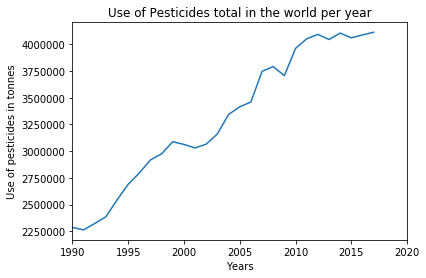

In [89]:
plt.plot(pesticides_total_world['Year'], pesticides_total_world['Value'])
plt.title('Use of Pesticides total in the world per year')
plt.xlabel('Years')
plt.ylabel('Use of pesticides in tonnes')
plt.xlim(1990, 2020)

### Here we see an increasing number of pesticides throughout the world. How is the increase considered only the toxic pesticides?

In [90]:
@interact
def show_beehives_for_country(country=big_decrease):
    pesticides_organoPhosphates_country=pesticides_organoPhosphates.loc[pesticides_organoPhosphates['Area']==country]
    plt.plot(pesticides_organoPhosphates_country['Year'],pesticides_organoPhosphates_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1990, 2020)

interactive(children=(Dropdown(description='country', options=('Austria', 'Egypt', 'France', 'Germany', 'Italy…

In [91]:
@interact
def show_beehives_for_country(country=big_decrease):
    pesticides_carbamates_country=pesticides_carbamates.loc[pesticides_carbamates['Area']==country]
    plt.plot(pesticides_carbamates_country['Year'],pesticides_carbamates_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1990, 2020)

interactive(children=(Dropdown(description='country', options=('Austria', 'Egypt', 'France', 'Germany', 'Italy…

In [92]:
@interact
def show_beehives_for_country(country=big_decrease):
    pesticides_pyrethroids_country=pesticides_pyrethroids.loc[pesticides_pyrethroids['Area']==country]
    plt.plot(pesticides_pyrethroids_country['Year'],pesticides_pyrethroids_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1990, 2020)

interactive(children=(Dropdown(description='country', options=('Austria', 'Egypt', 'France', 'Germany', 'Italy…

This data does look hard to obtain since a lot of countries are not covered in this dataset. However some are. From looking at the three different pesticides we see that Pyrethroids are increasing in Austria, France, Germany, France, Italy and Switzerland. The two other pesticides decrease.

### But what are Pyrethroids and why is the numer increasing this much? 

Insecticides in general are a substance to kill insects. Some of them are widely regarded as safe to the human but '2250 times more toxic to insects'. [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6174339/]. One of those is the Pyrethroid. It is recommendd for 'in-home insect control' to keep the house clean of insects and so widely spread. They can also be found in different products, like mosquito repellents, soap for pets or in our sprinkled in ones garden. [https://www.theverge.com/2014/2/19/5423480/popular-poison-pyrethroid-health-risks]

https://watermark.silverchair.com/pmx001.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAlQwggJQBgkqhkiG9w0BBwagggJBMIICPQIBADCCAjYGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMGvLTcs3fYq9aJOsPAgEQgIICBzTd9jne1QhZ_T5fZzBIejx_R7LDpCR70ccn4KZibpaCo4F45_hIucK74pNxtlgBOWFrlm03VoNG0tMh0QGAzYE47EIXfjHnlzA8xRPZ5Be_kuhoJjz6m-ky_crQbSp6xS-KdmA0Yw5Ri2dhuRBhNqlH20SRQ0PPp8Q_dn21vWLUBWG89du7w-s47b9FxkM01oMreUHytIlJ0VJacrUH02EZTpHUVP6QxUvsacALAzH_MMWrJ9dI-6CUdObk5ghgMxrwaF3HJgK_fMurXweTB_vu7EOPLsw7AcIir1d6kHy-ybdwvAOzx9CVhbXheELEXKcNOUsGY6rIjdFBa84PuHgKCpf4NIwTLLbd45U5CVqM2hIU_hx_BMnO5kEo-0OPURrIqp2jWFrJ4CleqGz_9RlFeicnAKtn7OQ7ey6u-3LDQCEOwOUJL6_-JD5LSxGu2SWvUl5oGvnmS7A0H7W4HN_H1zJRQ_5ECvc1GNTJGFt26vuubDTiqn1UHG-kq8CDJNhjbbWsCJYh1mcqMj6Qn-sndPMek39tRcSmYRu7xtl-fohQDgF_pDOcqS_zmWL1COny0kIydigv64ouhDL0TGa-cJsa8_IFbRG0HTeVeScqSdAdImR3xgUXEn876JxyeSQrmZIF_56YFkIK9bsAHWdRehWDdD7ax9YX2bq8gia_lLtLvpUenA 